#  Load data from an area. In this case Region of Valencia

In this post we will extract the route between two specified from points 

Firstly, we have to load data by using graph_from_place method. Use it wisely. For a whole cuntry it may crush. We will use a spacial filter to work only with highway 


In [1]:
import osmnx as ox
import networkx as nx
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import random
import shapely
import geopandas as gpd
import os
import folium

ox.config(use_cache=True, log_console=True)

# filter to get only main roads from specific zone
cf = '["highway"~"motorway|motorway_link"]'

# download graph with edgaes and nodes
G = ox.graph_from_place('Comunidad Valenciana, Spain', simplify=True, custom_filter=cf)

# print sum of specific class (motorway|motorway_link)
print(ox.graph_to_gdfs(G, nodes=False)['highway'].value_counts())

motorway_link                2138
motorway                     1225
[motorway_link, motorway]      25
Name: highway, dtype: int64


# Find rute between two points

To find a rute between two points, we have to find out the coordinates using World Geodetic System (EPSG:4326). This is the same  Geodetic System used by Google Maps so you can go directly to Google Maps and copy coordinates of a place you are interested in. Remember to put firstly latitude than longitude in the nearest_nodes method.


In [2]:
# find node in graph for origin and destination
destination_node = ox.nearest_nodes(G,  -0.46821730209784557,38.80993097719116) 
origin_node= ox.nearest_nodes(G, -0.23554547919295823,39.74120394041694)  
print(origin_node,destination_node)

# find the route between origin and destination
route = nx.shortest_path(G, origin_node, destination_node) 


276189457 1902632559


NetworkXNoPath: No path between 276189457 and 1902632559.

Upss.. Error! Why? That's simple. The osmnx is very cool and takes into account road direction. Therefore, when zooming to my selected points you will see that they are ubicated back to front to road direction.

![title](imgs/origin.png)
![title](imgs/dist.png)

## Handle NetworkXNoPath Error

In [3]:
# find node in graph for origin and destination
destination_node = ox.nearest_nodes(G,  -0.46821730209784557,38.80993097719116) 
origin_node= ox.nearest_nodes(G, -0.23554547919295823,39.74120394041694)  
print(origin_node,destination_node)

# find the route between origin and destination
try: 
    route = nx.shortest_path(G, origin_node, destination_node) 
except nx.NetworkXNoPath as e:
    print(e)
    print("Check out the road direction")
    

276189457 1902632559
No path between 276189457 and 1902632559.
Check out the road direction


# Let's exchange origin with destination
Cool. No error anymore.

In [4]:
destination_node = ox.nearest_nodes(G, -0.23554547919295823,39.74120394041694)  
origin_node = ox.nearest_nodes(G,  -0.46821730209784557,38.80993097719116) 

# find the route between origin and destination
try: 
    route = nx.shortest_path(G, origin_node, destination_node) 
except nx.NetworkXNoPath as e:
    print(e)
    print("Check out the road direction")
    

# find the route between origin and destination
route = nx.shortest_path(G, origin_node, destination_node)

Finally, to visualize a rute, run  plot_graph_route method.

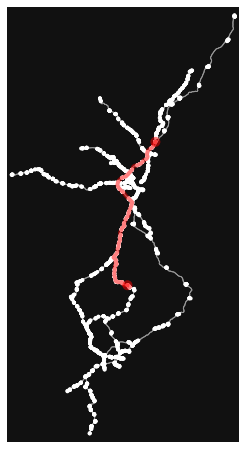

In [5]:
# plot graph with the route
ox.plot_graph_route(G, route);

# Plot map using folium

You can also use plot_route_folium to get awesome map with your generated rute just in 1 sec. I've selected cartodbdark_matter tiles but you can use any one you wish.

In [6]:
# plot the route with folium
ox.plot_route_folium(G, route,tiles="cartodbdark_matter")

# Convert extracted data into geoPandas frame

Great! We have amazing map with our rute. But how can we extract data from the graph and use it for the futher analysis? That's also simple. Just run graph_to_gdfs mehtod to convert whole Graph to geoFrame. Next, to select only edgaes from our rute just select rows where the nodes are from the rute.

And that's it! Let me know if you the post was helpfull for you 

In [7]:
# convertir el graph a geopandas
gdf = ox.graph_to_gdfs(G, nodes=False).reset_index()  

# select rows with nodes from route
gdf_route = gdf[gdf.v.isin(route)]

gdf_route.head()

,u,v,key,osmid,oneway,lanes,ref,name,highway,maxspeed,length,bridge,geometry,tunnel,junction,access
856,13844071,13844882,0,"[93702385, 93702383, 23087751]",True,3,A-7,Autovía del Mediterráneo,motorway,120,880.781,yes,"LINESTRING (-0.56743 39.00779, -0.56674 39.008...",NaN,NaN,NaN
858,13844139,13844256,0,"[182593460, 182596436, 182593463]",True,3,A-7,Autovía del Mediterráneo,motorway,120,845.867,yes,"LINESTRING (-0.52679 39.12994, -0.52576 39.131...",NaN,NaN,NaN
861,13844140,13844360,0,180794170,True,NaN,A-7,Autovía del Mediterráneo,motorway,NaN,591.454,NaN,"LINESTRING (-0.55831 38.83180, -0.55929 38.831...",NaN,NaN,NaN
863,13844141,13844757,0,182596436,True,3,A-7,Autovía del Mediterráneo,motorway,120,819.823,NaN,"LINESTRING (-0.53959 39.08563, -0.53906 39.086...",NaN,NaN,NaN
864,13844223,821715299,0,"[939059109, 183590955, 183590962, 85703641, 18...",True,2,NaN,Autovía del Mediterráneo,motorway,NaN,531.255,yes,"LINESTRING (-0.57543 38.98272, -0.57612 38.983...",NaN,NaN,NaN


<AxesSubplot:>

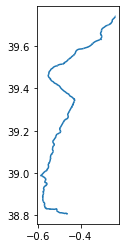

In [8]:
gdf_route.geometry.plot()

In [ ]:
input_area = "Comunidad Valenciana"
start_x,start_y =
end_x,end_y = 